In [2]:
import sys
#sys.path.insert(0, '../../Utilities/')

import tensorflow as tf
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from pyDOE import lhs #拉丁超立方抽样（英语：Latin hypercube sampling，缩写LHS）是一种从多元参数分布中近似随机抽样的方法，属于分层抽样技术，常用于计算机实验或蒙特卡洛积分等。

#from plotting import newfig, savefig
#from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

c:\Users\assiduity\anaconda3\envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\assiduity\anaconda3\envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\assiduity\anaconda3\envs\tf36\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\assiduity\anaconda3\envs\tf36\lib\site-packages\tensorf

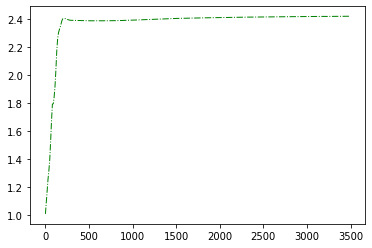

In [12]:
a_hist=np.load("D:\\LOVESTUDY\\paddle\\helmholtz\\a_history.npy")
a_hist=np.reshape(a_hist,(-1,1))
plt.figure(1)
plt.plot(np.arange(1,3501,10),10*a_hist,  'g-.', linewidth = 1, label = "n=10")
plt.savefig("na.jpg")


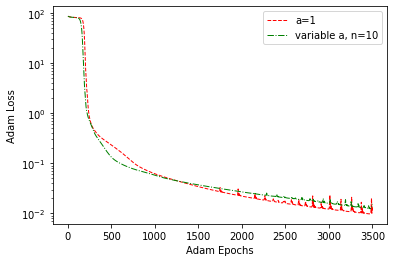

In [54]:
MSE_hist_0=np.load("D:\\LOVESTUDY\\paddle\\helmholtz\\MSE_hist_1.npy")
MSE_hist_1=np.load("D:\\LOVESTUDY\\paddle\\helmholtz\\MSE_hist.npy")
fig = plt.figure(2)
plt.plot( MSE_hist_0[0:3500],  'r--', linewidth = 1, label = "a=1") 
plt.plot(MSE_hist_1[0:3500],  'g-.', linewidth = 1, label = "variable a, n=10") 

plt.legend()
plt.xlabel('Adam Epochs')
plt.ylabel('Adam Loss')
plt.yscale('log')
plt.savefig('h_MSEhistory_iall2.jpg') 

In [32]:
from math import pi


def exact_fun(x,y):
    u = (x+y)*np.sin(pi*x)*np.sin(pi*y)
    return u

In [52]:
y=np.linspace(-1,1,100)
x =np.linspace(-1,1,100)
[X,Y]=np.meshgrid(x,y)
Z=exact_fun(X,Y)
scipy.io.savemat("Helmholtz-exat.mat",{'x':x,'y':y,'u':Z})

#Out=np.load("D:\\LOVESTUDY\\paddle\\helmholtz\\(x,y,u).npy")
#print(Out[0:10000,2:3])
#plt.figure(3)
#plt.contourf(X,Y,Out[:,2:3].reshape((100,100)),100,cmap=plt.cm.seismic)


c:\Users\assiduity\anaconda3\envs\tf36\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


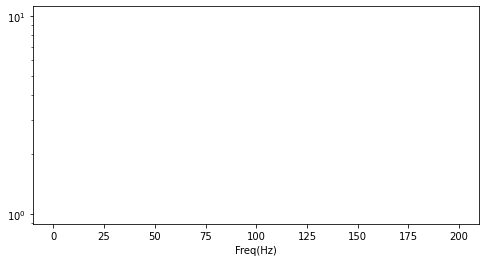

In [47]:
k=np.ones(400)*0.5

sampling_rate = 400#采样频率为8000Hz
fft_size = 128 #FFT处理的取样长度

t = np.arange(0, 1.0, 1.0/sampling_rate)#np.arange(起点，终点，间隔)产生1s长的取样时间
x=exact_fun(k,t)

# N点FFT进行精确频谱分析的要求是N个取样点包含整数个取样对象的波形。因此N点FFT能够完美计算频谱对取样对象的要求是n*Fs/N（n*采样频率/FFT长度），
# 因此对8KHZ和512点而言，完美采样对象的周期最小要求是8000/512=15.625HZ,所以156.25的n为10,234.375的n为15。
xs = x[:fft_size]# 从波形数据中取样fft_size个点进行运算
xf = np.fft.rfft(xs)/fft_size# 利用np.fft.rfft()进行FFT计算，rfft()是为了更方便对实数信号进行变换，由公式可知/fft_size为了正确显示波形能量
# rfft函数的返回值是N/2+1个复数，分别表示从0(Hz)到sampling_rate/2(Hz)的分。
#于是可以通过下面的np.linspace计算出返回值中每个下标对应的真正的频率：
freqs = np.linspace(0, 200,65)
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
#在指定的间隔内返回均匀间隔的数字
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
#最后我们计算每个频率分量的幅值，并通过 20*np.log10()将其转换为以db单位的值。为了防止0幅值的成分造成log10无法计算，我们调用np.clip对xf的幅值进行上下限处理

#绘图显示结果
plt.figure(figsize=(8,4))
plt.yscale("log")
plt.plot(freqs, xfp)
plt.xlabel(u"Freq(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()


In [30]:
a=[[1],[2],[3]]
b=[[1],[2],[3]]
tf.multiply(a,b)

<tf.Tensor 'Mul:0' shape=(3, 1) dtype=int32>

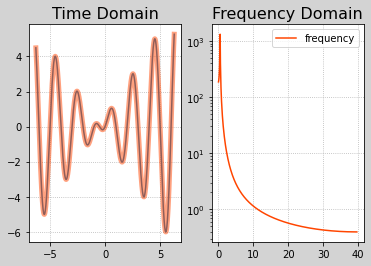

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as nf

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = exact_fun(0.5,x)

plt.figure('FFT', facecolor='lightgray')
plt.subplot(121)
plt.title('Time Domain', fontsize=16)
plt.grid(linestyle=':')
plt.plot(x, y, label=r'$y$')
# 针对方波y做fft
comp_arr = nf.fft(y)
y2 = nf.ifft(comp_arr).real
plt.plot(x, y2, color='orangered', linewidth=5, alpha=0.5, label=r'$y$')
# 绘制频域图形
plt.subplot(122)
freqs = nf.fftfreq(y.size, x[1] - x[0])
pows = np.abs(comp_arr)  # 复数的模
plt.title('Frequency Domain', fontsize=16)
plt.grid(linestyle=':')
plt.plot(freqs[freqs > 0], pows[freqs > 0], color='orangered', label='frequency')
plt.yscale("log")
plt.legend()
plt.savefig('fft.png')
plt.show()